In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import minmax_scale
from matplotlib.colors import rgb2hex
import mapclassify
import adjustText as aT
import matplotlib as mpl
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import re
import plotly.figure_factory as ff

# incorporamos geopandas! geografía + pandas :)
import geopandas as gpd
from sklearn.preprocessing import normalize

%matplotlib inline
sns.set(context='notebook', style='white', palette='plasma')
#https://plot.ly/python/v3/table/
#https://seaborn.pydata.org/tutorial/color_palettes.html
#http://colorbrewer2.org/#type=sequential&scheme=Greens&n=3

In [59]:
numeroRegion=13
numeroDivisiones=4
fontSizeTitulo=40
fontSizeEnMapa=14
Zoom=3
scheme='Fisher_Jenks'

In [60]:
dataProsupuestoMunicipal = pd.read_excel('data/datos_municipales_Disponibilidad_Presupuesto_PerCapita.xls')
#dataProsupuestoMunicipal.head()

In [61]:
dataPobreza = pd.read_excel('data/Indice_Pobreza_Porcentaje_Casem2018.xlsx')
#dataPobreza.head()

In [62]:
zonas_eod = gpd.read_file('data/Comunas', encoding="utf-8",converters={'cod_comuna':str})
zonas_eod.head()

,objectid,shape_leng,dis_elec,cir_sena,cod_comuna,codregion,st_area_sh,st_length_,Region,Comuna,Provincia,geometry
0,48,170038.624165,16,8,6204,6,9.685774e+08,206184.271675,Región del Libertador Bernardo O'Higgins,Marchigüe,Cardenal Caro,"POLYGON ((-7992818.789 -4056669.319, -7992731...."
1,29,125730.104795,15,8,6102,6,4.157446e+08,151911.576827,Región del Libertador Bernardo O'Higgins,Codegua,Cachapoal,"POLYGON ((-7831651.813 -4022443.109, -7831596...."
2,30,63026.084422,15,8,6103,6,1.448565e+08,76355.326122,Región del Libertador Bernardo O'Higgins,Coinco,Cachapoal,"POLYGON ((-7892616.357 -4060673.364, -7892621...."
3,31,89840.903562,15,8,6104,6,3.256572e+08,108874.623150,Región del Libertador Bernardo O'Higgins,Coltauco,Cachapoal,"POLYGON ((-7906457.717 -4051723.734, -7906266...."
4,78,122626.493264,23,11,9121,9,6.990727e+08,156680.410681,Región de La Araucanía,Cholchol,Cautín,"POLYGON ((-8121756.186 -4645860.295, -8121644...."


In [63]:
dataset = pd.merge(zonas_eod, dataPobreza, left_on='cod_comuna',right_on='CODIGO',how='inner') 
dataset = pd.merge(dataset, dataProsupuestoMunicipal, left_on='cod_comuna',right_on='CODIGO',how='inner') 

In [64]:
codigoRegion=13
datasetRegion=dataset[dataset['codregion']==numeroRegion]
datasetRegion=datasetRegion.reset_index()
datasetRegion['Indice'] = datasetRegion.index
#datasetRegion.head()

In [65]:
datasetRegion["center"] = datasetRegion["geometry"].centroid
datasetRegion_points = datasetRegion.copy()
datasetRegion_points.set_geometry("center", inplace = True)

# Pobreza

In [66]:
len(datasetRegion)

52

In [67]:
datasetRegion['IndiceNombre']=datasetRegion['Indice'].map(str) +':'+ datasetRegion['Comuna']

fig = go.Figure(data=[go.Table(
    header=dict(values=list(datasetRegion[['Comuna']].columns),
                fill_color='lightskyblue',
                line_color='#87CEEB',
                align='left'),
    cells=dict(values=[datasetRegion.IndiceNombre],
               fill_color='white',
                line_color='#87CEEB',
               align='left'))
])

fig.update_layout(width=320, height= (26 * len(datasetRegion) ), font=dict(
        family="Courier New, monospace",
        size=14,
        color="black"
    )     )
fig.show()

1

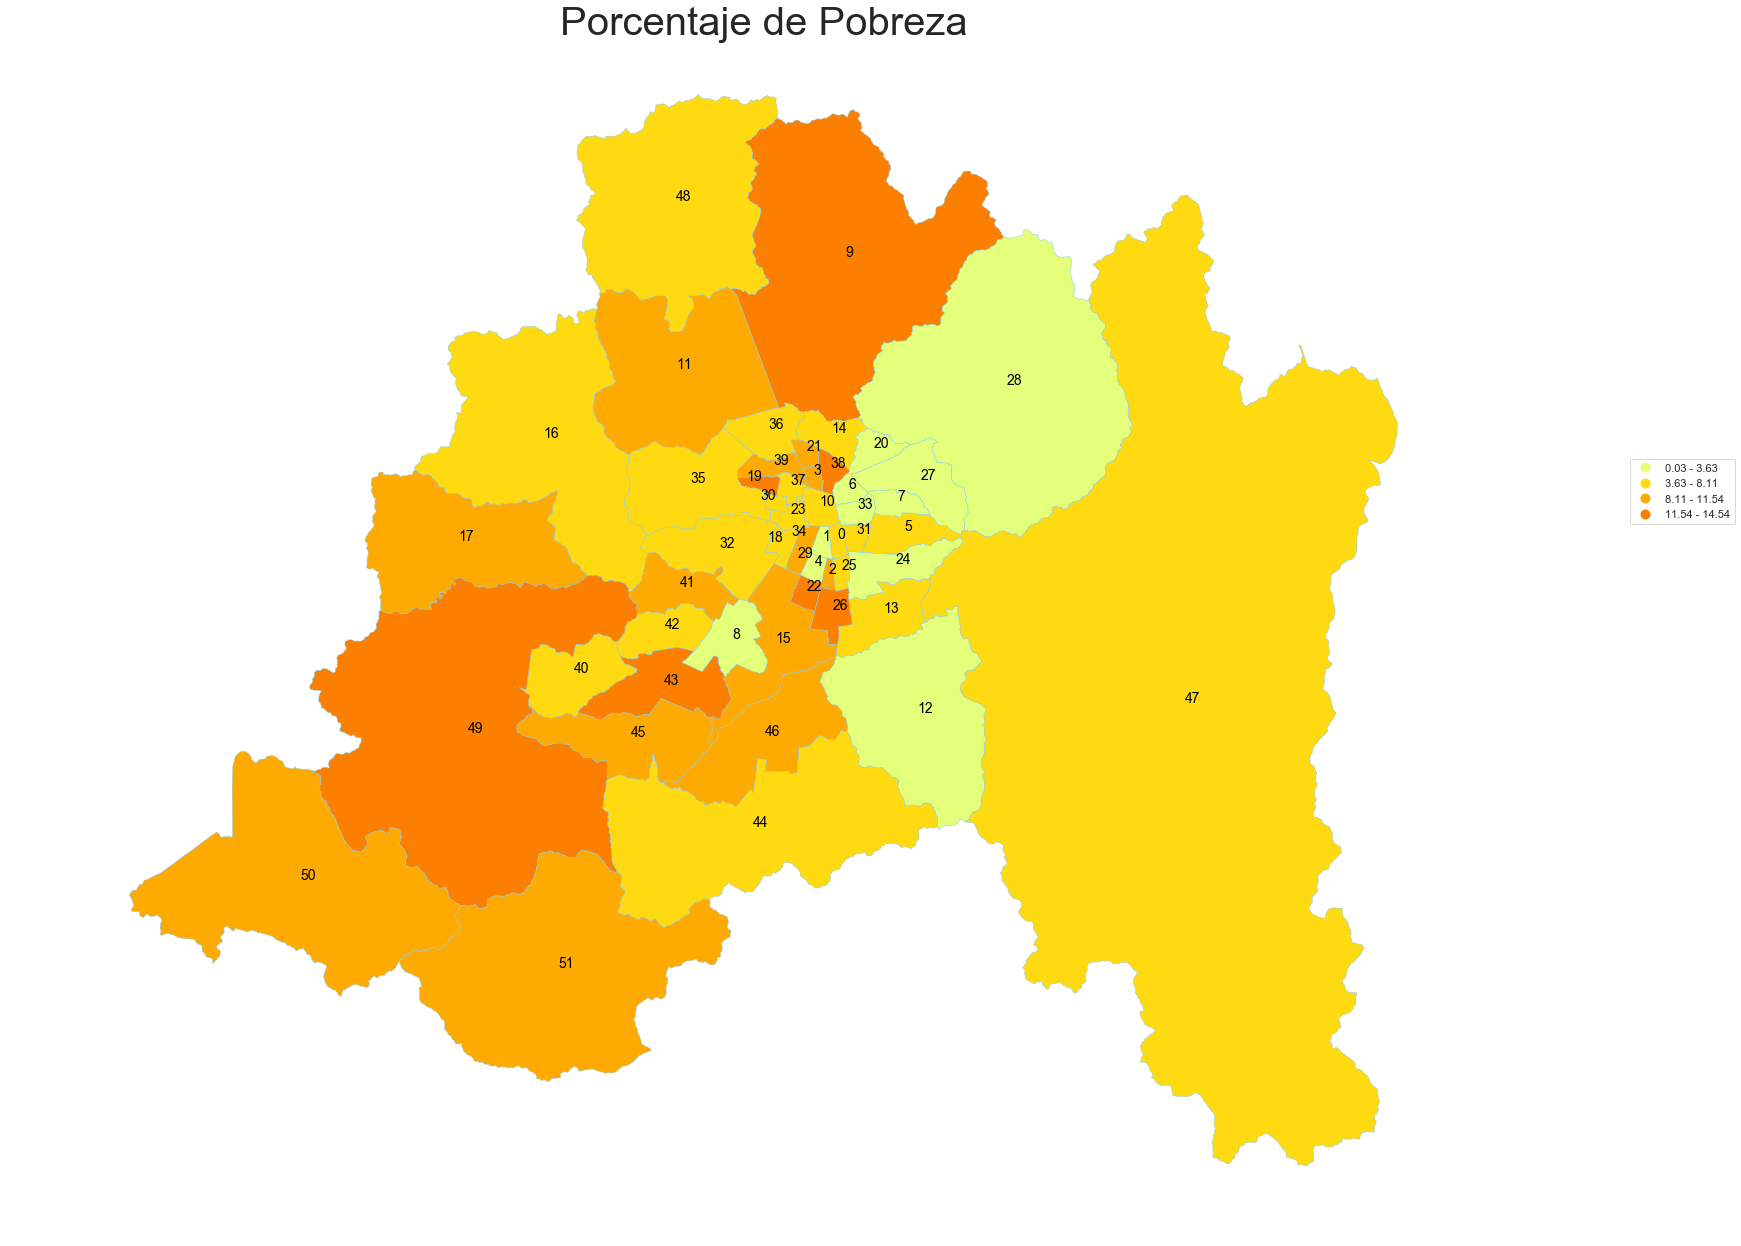

In [78]:
ax = datasetRegion.plot(figsize=(25, 25), column='Indice_Pobreza_Porcentaje_Casem2018', cmap='Wistia', 
                         legend=True, linewidth=0.5, edgecolor='#87CEEB', scheme=scheme, 
                         k=numeroDivisiones)
##########################################
plt.title('Porcentaje de Pobreza', fontsize=fontSizeTitulo)
leg = ax.get_legend()
leg.set_bbox_to_anchor((1., 0.45, 0.2, 0.2))


##########################################
#ylim = (-3970000,-3920000) # latitude 
#xlim = (-7880000,-7830000) # longitude

#ax.set_xlim(xlim)
#ax.set_ylim(ylim)

ax.set_axis_off()

texts = []
for x, y, label in zip(datasetRegion_points.geometry.x, datasetRegion_points.geometry.y, 
                       datasetRegion_points["Indice"]):texts.append(plt.text(x, y, label, fontsize = fontSizeEnMapa,
                                                                             color='black'))
##########################################
#aT.adjust_text(texts, force_points=0.3, force_text=0.5, expand_points=(0,1), expand_text=(0,0), arrowprops=dict(arrowstyle="-", color='grey', lw=0.5))
aT.adjust_text(texts, force_points=0.3, force_text=0.5, expand_points=(0,1), expand_text=(0,0))



1

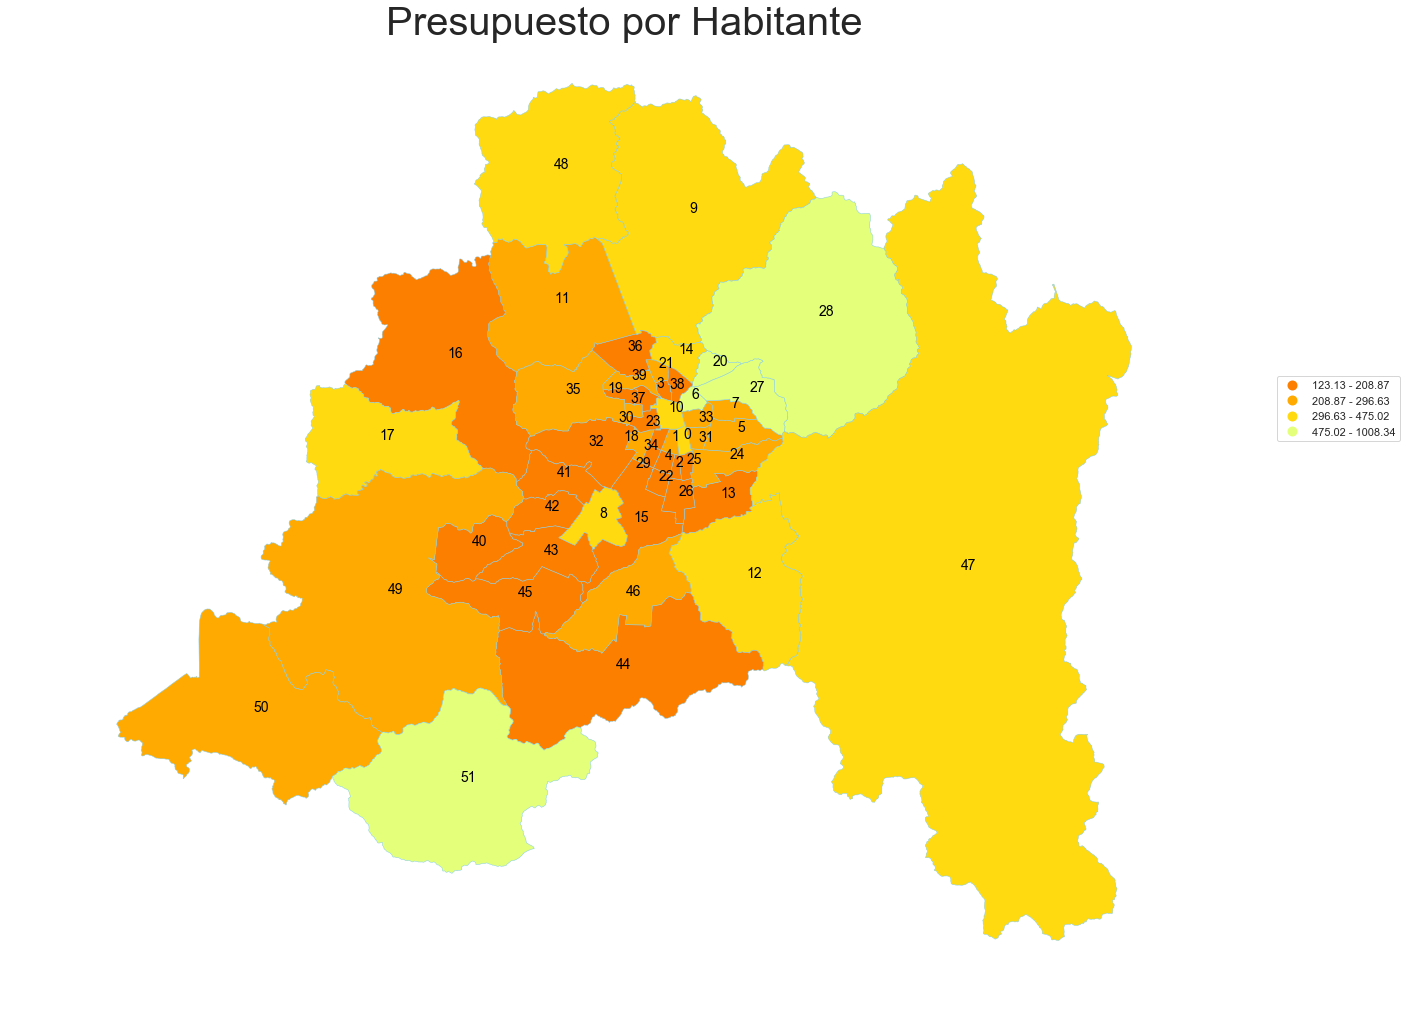

In [77]:
ax = datasetRegion.plot(figsize=(20, 20), column='IADM10 (TAS) Disponibilidad Presupuestaria Municipal por Habitante (M$)_2018', 
                        cmap='Wistia_r', 
                         legend=True, linewidth=0.5, edgecolor='#87CEEB', scheme=scheme, 
                         k=numeroDivisiones)
##########################################
plt.title('Presupuesto por Habitante', fontsize=fontSizeTitulo)
leg = ax.get_legend()
leg.set_bbox_to_anchor((1., 0.45, 0.2, 0.2))
##########################################
#ylim = (-3970000,-3920000) # latitude 
#xlim = (-7880000,-7830000) # longitude

#ax.set_xlim(xlim)
#ax.set_ylim(ylim)

ax.set_axis_off()

texts = []
for x, y, label in zip(datasetRegion_points.geometry.x, datasetRegion_points.geometry.y, 
                       datasetRegion_points["Indice"]):texts.append(plt.text(x, y, label, fontsize = fontSizeEnMapa,
                                                                             color='black'))
##########################################
#aT.adjust_text(texts, force_points=0.3, force_text=0.5, expand_points=(0,1), expand_text=(0,0), arrowprops=dict(arrowstyle="-", color='grey', lw=0.5))
aT.adjust_text(texts, force_points=0.3, force_text=0.5, expand_points=(0,1), expand_text=(0,0))

